# Final document with all the plots

In [29]:
import dt 
#import cnn 
import nn 
from load_data import load_data
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [30]:
X_train, y_train, X_test, y_test = load_data()

# Exploratory data analysis

In [83]:
savefigs = True
if savefigs:
    if not os.path.isdir('figs'):
        os.makedirs('figs')


#if savefigs: plt.savefig('../figs/DegreeDistribution.png', bbox_inches = 'tight')

In [32]:
sns.set_theme(style='whitegrid', palette="flare")
NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

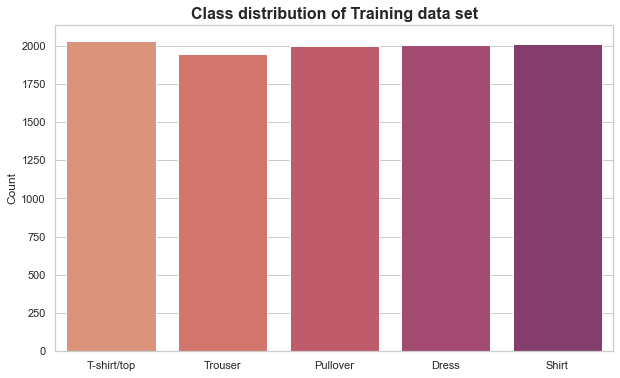

In [33]:

def plot_y_distribution(y, t):
    ''' Plot the distribution of the labels '''
    classes, classes_counts = np.unique(y, return_counts=True)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=classes, y=classes_counts, ax=ax);
    ax.set_title(f'Class distribution of {t}', fontsize=16, fontweight='bold');
    ax.set_ylabel('Count');
    ax.set_xticklabels(NAMES);



plot_y_distribution(y_train, "Training data set")
#if savefigs: plt.savefig('figs/distributiontrainingdataset.png', bbox_inches = 'tight')

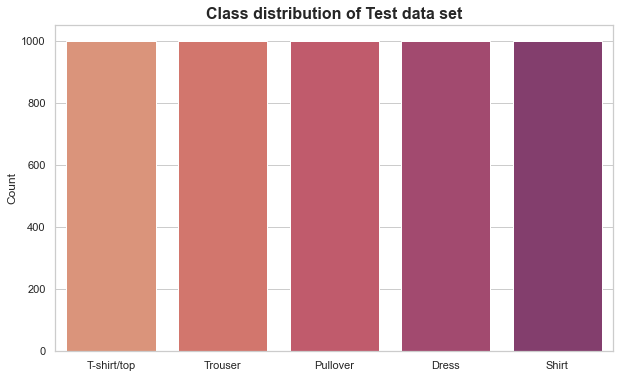

In [34]:
plot_y_distribution(y_test, "Test data set")
#if savefigs: plt.savefig('figs/distributiontestdataset.png', bbox_inches = 'tight')

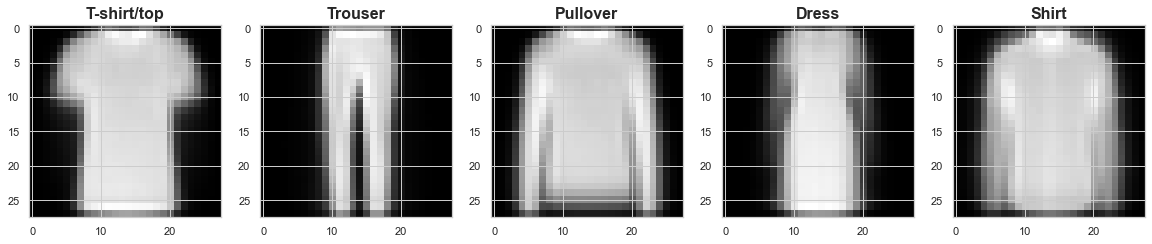

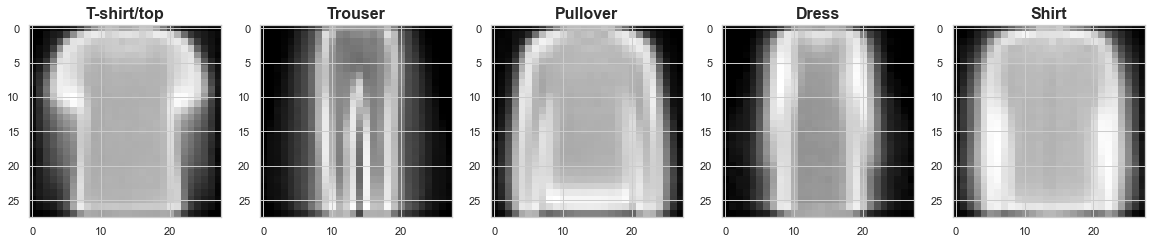

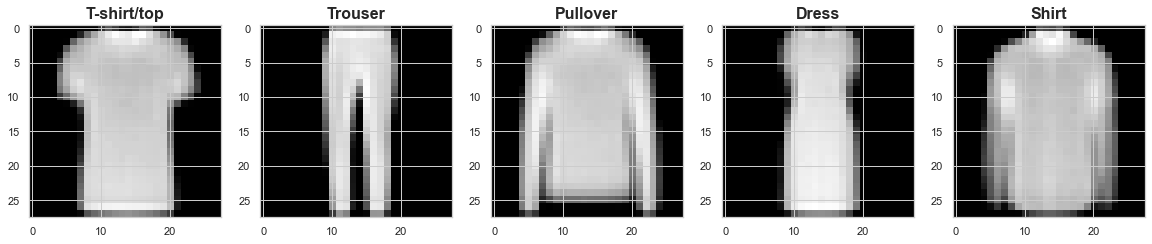

In [35]:
def plot_images(X, y, measure='mean'):
    ''' Plot the mean, median, or std of the images'''
    classes = np.unique(y)
    fig, ax = plt.subplots(1, len(classes), figsize=(20, 8))
    for c in classes:
        imgs = X[y == c]

        if measure == 'mean': av_img = np.mean(imgs, axis=0).reshape(28, 28)
        elif measure == 'median': av_img = np.median(imgs, axis=0).reshape(28, 28)
        elif measure == 'std': av_img = np.std(imgs, axis=0).reshape(28, 28)

        ax[c].imshow(av_img, cmap='gray')
        ax[c].set_title(NAMES[c], fontsize=16, fontweight='bold')


plot_images(X_train, y_train)
#if savefigs: plt.savefig('figs/mean.png', bbox_inches = 'tight')
plot_images(X_train, y_train, measure='std')
#if savefigs: plt.savefig('figs/std.png', bbox_inches = 'tight')
plot_images(X_train, y_train, measure='median')
#if savefigs: plt.savefig('figs/median.png', bbox_inches = 'tight')

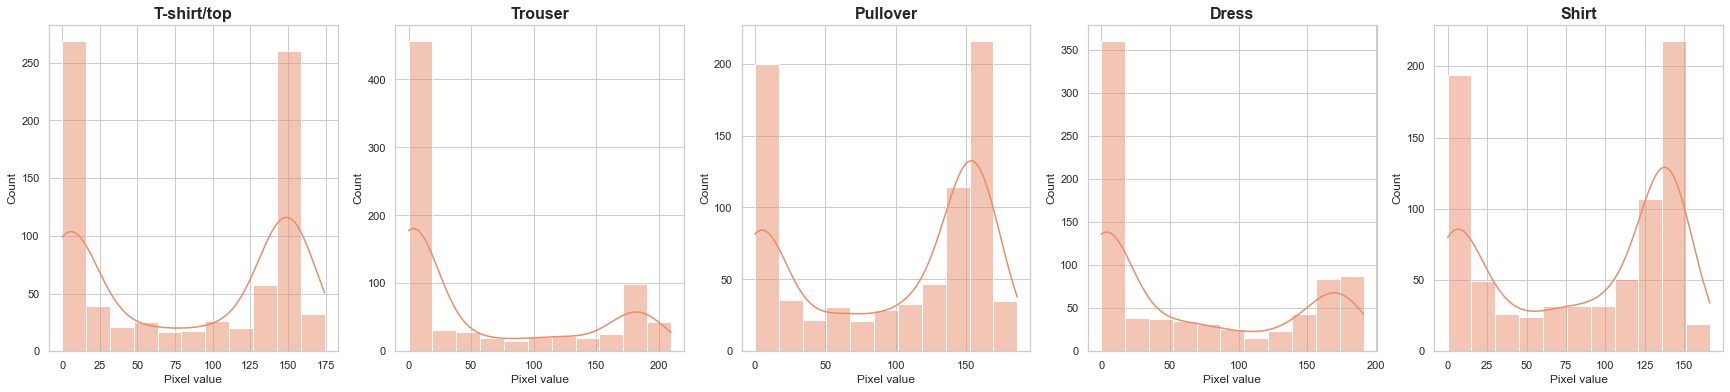

In [36]:
def plot_color_distribution(X, y):
    ''' Plot the distribution of the colors '''
    classes = np.unique(y)
    av_imgs = np.zeros((len(classes), 28, 28))
    for c in classes:
        imgs = X[y == c]
        av_imgs[c] = np.mean(imgs, axis=0).reshape(28, 28)

    #plot the distribution of the average image
    fig, ax = plt.subplots(1, len(classes), figsize=(30, 6))
    for c in classes:
        sns.histplot(av_imgs[c].flatten(), ax=ax[c], kde=True)
        ax[c].set_title(NAMES[c], fontsize=16, fontweight='bold')
        ax[c].set_xlabel('Pixel value')
        ax[c].set_ylabel('Count')

plot_color_distribution(X_train, y_train)
#if savefigs: plt.savefig('figs/colordistribution.png', bbox_inches = 'tight')

# Neural Network

In [37]:
def make_plots(data, labels, activationfunction):
    fig, axes = plt.subplots(1,2, figsize = (20, 5))
    for i, label in enumerate(labels):
        colors_taratt = ['#761878', '#826fc9', '#b1c2f0' ]
        sns.lineplot(x = 'epoch', y = label, palette = colors_taratt, data = data, ax = axes.flat[i]);
        axes.flat[i].set_title(f' History of {label} with {activationfunction}', size = 13)
        axes.flat[i].set(ylabel= f'{label}', xlabel = 'Number of epochs');

Epoch 0, loss: 0.178125, accuracy: 0.109375
Epoch 1, loss: 0.165625, accuracy: 0.171875
Epoch 2, loss: 0.184375, accuracy: 0.078125
Epoch 3, loss: 0.153125, accuracy: 0.234375
Epoch 4, loss: 0.171875, accuracy: 0.140625
Epoch 5, loss: 0.134375, accuracy: 0.328125
Epoch 6, loss: 0.1625, accuracy: 0.1875
Epoch 7, loss: 0.165625, accuracy: 0.171875
Epoch 8, loss: 0.15625, accuracy: 0.21875
Epoch 9, loss: 0.165625, accuracy: 0.171875
Epoch 10, loss: 0.165625, accuracy: 0.171875
Epoch 11, loss: 0.146875, accuracy: 0.265625
Epoch 12, loss: 0.15, accuracy: 0.25
Epoch 13, loss: 0.171875, accuracy: 0.140625
Epoch 14, loss: 0.153125, accuracy: 0.234375
Epoch 15, loss: 0.15625, accuracy: 0.21875
Epoch 16, loss: 0.165625, accuracy: 0.171875
Epoch 17, loss: 0.1625, accuracy: 0.1875
Epoch 18, loss: 0.175, accuracy: 0.125
Epoch 19, loss: 0.15, accuracy: 0.25
Epoch 20, loss: 0.1625, accuracy: 0.1875
Epoch 21, loss: 0.140625, accuracy: 0.296875
Epoch 22, loss: 0.146875, accuracy: 0.265625
Epoch 23, los

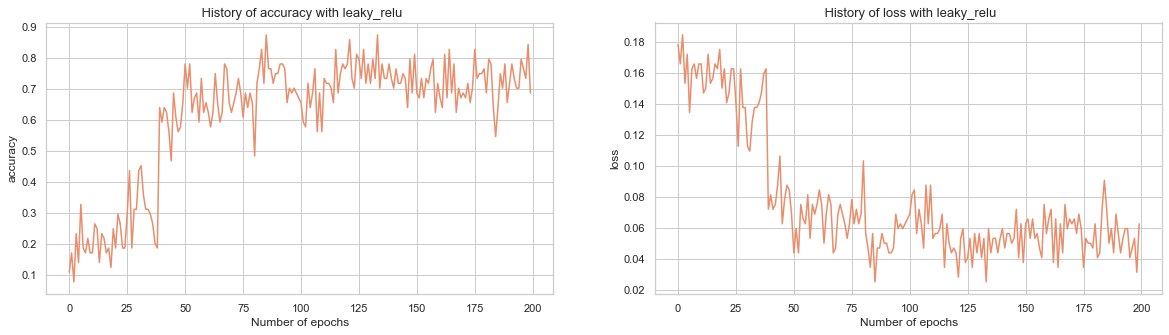

In [38]:
nn_leakyrelu = nn.NeuralNetwork(test=True, activation_name='leaky_relu')
df_leakyrelu = nn_leakyrelu.TRAIN(X_train, y_train, epochs=200, testing=True)
nn_leakyrelu.TEST(X_test, y_test)
make_plots(df_leakyrelu, ["accuracy", "loss"], "leaky_relu")
if savefigs: plt.savefig('figs/nn_leakyrelu.png', bbox_inches = 'tight')

Epoch 0, loss: 0.153125, accuracy: 0.234375
Epoch 1, loss: 0.115625, accuracy: 0.421875
Epoch 2, loss: 0.1625, accuracy: 0.1875
Epoch 3, loss: 0.15625, accuracy: 0.21875
Epoch 4, loss: 0.165625, accuracy: 0.171875
Epoch 5, loss: 0.15625, accuracy: 0.21875
Epoch 6, loss: 0.115625, accuracy: 0.421875
Epoch 7, loss: 0.10625, accuracy: 0.46875
Epoch 8, loss: 0.115625, accuracy: 0.421875
Epoch 9, loss: 0.13125, accuracy: 0.34375
Epoch 10, loss: 0.115625, accuracy: 0.421875
Epoch 11, loss: 0.13125, accuracy: 0.34375
Epoch 12, loss: 0.14375, accuracy: 0.28125
Epoch 13, loss: 0.153125, accuracy: 0.234375
Epoch 14, loss: 0.1125, accuracy: 0.4375
Epoch 15, loss: 0.0625, accuracy: 0.6875
Epoch 16, loss: 0.065625, accuracy: 0.671875
Epoch 17, loss: 0.05625, accuracy: 0.71875
Epoch 18, loss: 0.075, accuracy: 0.625
Epoch 19, loss: 0.071875, accuracy: 0.640625
Epoch 20, loss: 0.09375, accuracy: 0.53125
Epoch 21, loss: 0.05625, accuracy: 0.71875
Epoch 22, loss: 0.115625, accuracy: 0.421875
Epoch 23, l

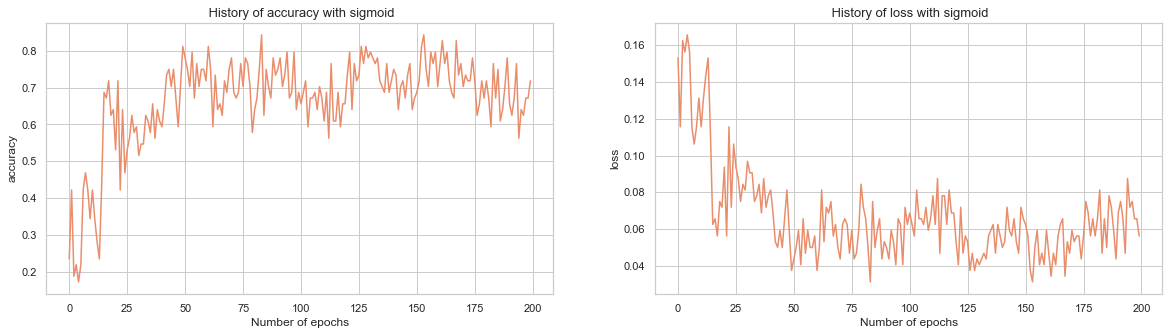

In [39]:
nn_sigmoid= nn.NeuralNetwork(test=True, activation_name='sigmoid')
df_sigmoid = nn_sigmoid.TRAIN(X_train, y_train, epochs=200, testing=True)
nn_sigmoid.TEST(X_test, y_test)
make_plots(df_sigmoid,["accuracy", "loss"], "sigmoid" )
if savefigs: plt.savefig('figs/nn_sigmoid.png', bbox_inches = 'tight')

# Decision Tree

In [40]:
x = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=3)
pcax = pca.fit_transform(x)
df = pd.DataFrame(data = pcax, columns= ['pc 1', 'pc 2', 'pc 3'])
df = pd.concat([df, pd.DataFrame(y_train, columns = ['y'])], axis = 1)

x_t = StandardScaler().fit_transform(X_test)
pca = PCA(n_components=3)
pcax = pca.fit_transform(x_t)
df_t = pd.DataFrame(data = pcax, columns= ['pc 1', 'pc 2', 'pc 3'])
df_t = pd.concat([df_t, pd.DataFrame(y_test, columns = ['y'])], axis = 1)

#### PCA for Decision Tree

In [41]:
df.head()

,pc 1,pc 2,pc 3,y
0,-0.504663,2.608573,8.314985,0
1,-18.182703,0.285265,-1.836167,1
2,5.345144,-2.348569,10.012185,0
3,-11.084712,1.340172,0.995286,3
4,-1.613810,10.749582,-1.596986,4


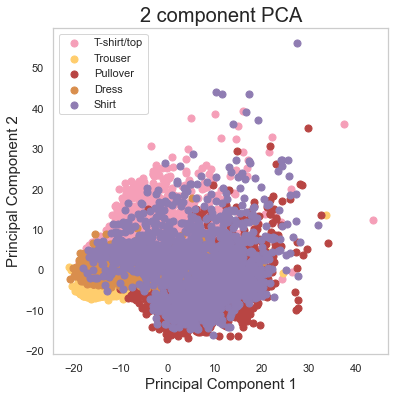

In [42]:
colours = ['#F59FB8', '#FFCD6D', '#B84543', '#D98E4D', '#8F7CB2']
fig, ax = plt.subplots(figsize = (6,6)) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
for target, color in zip(targets,colours):
    indicesToKeep = df['y'] == target
    ax.scatter(df.loc[indicesToKeep, 'pc 2']
               , df.loc[indicesToKeep, 'pc 3']
               , c = color
               , s = 50)
ax.legend(NAMES);
ax.grid();

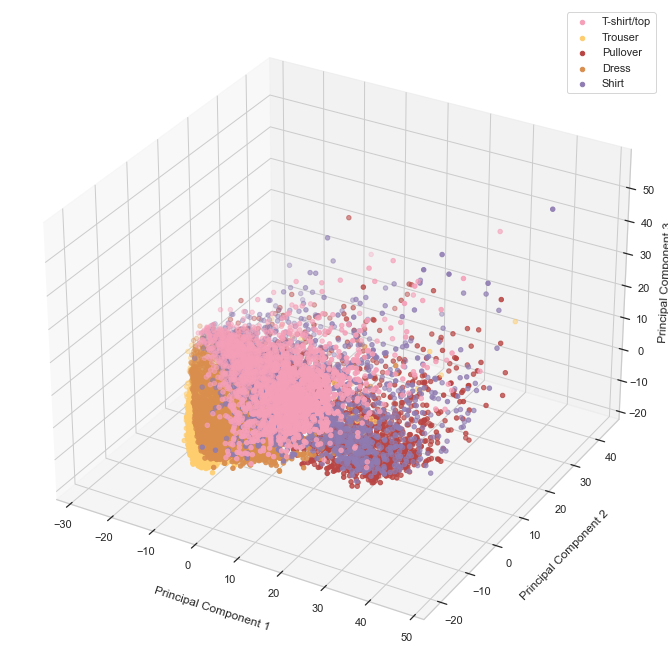

In [43]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

for target, color in zip(targets,colours):
    indicesToKeep = df['y'] == target
    ax.scatter(df.loc[indicesToKeep, 'pc 1'], 
                df.loc[indicesToKeep, 'pc 2'],
                df.loc[indicesToKeep, 'pc 3'],
                c = color)

ax.set_xlabel('Principal Component 1', labelpad=15);
ax.set_ylabel('Principal Component 2', labelpad = 15);
ax.set_zlabel('Principal Component 3');
plt.subplots_adjust(right = 0.2)
ax.legend(NAMES);
plt.tight_layout();

if savefigs:plt.savefig('figs/pca.png', bbox_inches = 'tight')

In [44]:
X_train = df.iloc[:, :-1].values
Y_train= df.iloc[:, -1].values.reshape(-1,1)

X_test = df_t.iloc[:, :-1].values
Y_test = df_t.iloc[:, -1].values.reshape(-1,1)

In [45]:
if False:
    classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=3)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)

In [46]:
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred, target_names=NAMES))

0.5084
              precision    recall  f1-score   support

 T-shirt/top       0.57      0.85      0.68      1000
     Trouser       0.51      0.86      0.64      1000
    Pullover       0.46      0.83      0.59      1000
       Dress       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000

    accuracy                           0.51      5000
   macro avg       0.31      0.51      0.38      5000
weighted avg       0.31      0.51      0.38      5000



In [ ]:
if False:
    l = list()
    for i in range(1,10):
        classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=i)
        classifier.fit(X_train,Y_train)
        Y_pred = classifier.predict(X_test)
        
        l.append([i, accuracy_score(Y_test, Y_pred)])

    dt_dataframe =pd.DataFrame(data=l, columns=['depht', 'accuracy'])
    

In [48]:
l = list()

In [49]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=1)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([1, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [50]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=2)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([2, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [51]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([3, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [52]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=4)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([4, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [53]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=5)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([5, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [54]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=6)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([6, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [56]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=7)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([7, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [55]:
l

[[1, 0.5289, 0.5084],
 [2, 0.6174, 0.5236],
 [3, 0.6597, 0.5664],
 [4, 0.6672, 0.5706],
 [5, 0.6915, 0.5976],
 [6, 0.7066, 0.6048]]

In [57]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=8)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([8, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [58]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=9)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([9, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [59]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=10)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([10, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [60]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=11)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([11, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [61]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=12)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([12, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [62]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=13)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([13, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [63]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=14)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([14, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [64]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=15)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([15, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [65]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=16)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([16, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [66]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=17)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([17, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [67]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=18)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([18, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [68]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=19)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([19, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [69]:
classifier = dt.DecisionTreeClassifier(min_samples_split=3, max_depth=20)
classifier.fit(X_train,Y_train)
Y_trainpred= classifier.predict(X_train)
Y_pred = classifier.predict(X_test)
        
l.append([20, accuracy_score(Y_train, Y_trainpred),accuracy_score(Y_test, Y_pred)])

In [70]:
l

[[1, 0.5289, 0.5084],
 [2, 0.6174, 0.5236],
 [3, 0.6597, 0.5664],
 [4, 0.6672, 0.5706],
 [5, 0.6915, 0.5976],
 [6, 0.7066, 0.6048],
 [7, 0.7269, 0.6202],
 [8, 0.7526, 0.5744],
 [9, 0.7793, 0.592],
 [10, 0.8111, 0.582],
 [11, 0.8411, 0.5732],
 [12, 0.8695, 0.573],
 [13, 0.8943, 0.5712],
 [14, 0.9165, 0.5686],
 [15, 0.9318, 0.567],
 [16, 0.9459, 0.5658],
 [17, 0.9546, 0.5606],
 [18, 0.9615, 0.5556],
 [19, 0.9664, 0.5554],
 [20, 0.9702, 0.5546]]

In [71]:
df_decisiontree = pd.DataFrame(data= l, columns=['depth', 'accuracy training', 'accuracy test'])

In [72]:
df_decisiontree.head()

,depth,accuracy training,accuracy test
0,1,0.5289,0.5084
1,2,0.6174,0.5236
2,3,0.6597,0.5664
3,4,0.6672,0.5706
4,5,0.6915,0.5976


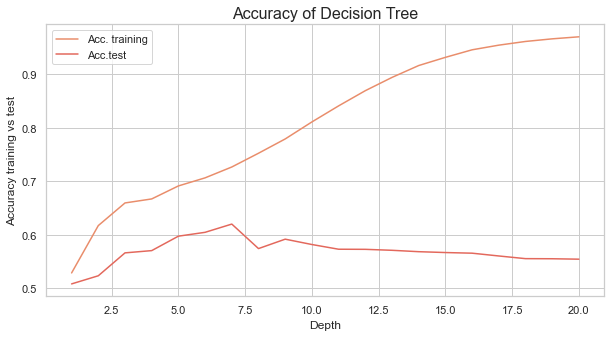

In [85]:

fig, ax = plt.subplots(figsize = (10, 5))
colors_taratt = ['#761878', '#826fc9', '#b1c2f0' ]
sns.lineplot(x = 'depth', y = 'accuracy training', palette = colors_taratt, data = df_decisiontree);
sns.lineplot(x = 'depth', y = 'accuracy test', palette = colors_taratt, data = df_decisiontree);
ax.set_title(f'Accuracy of Decision Tree', size = 16)
ax.set(ylabel= f'Accuracy training vs test', xlabel = 'Depth');
ax.legend(['Acc. training', 'Acc.test'])

if savefigs: plt.savefig('figs/accuracydecisiontree.png', bbox_inches = 'tight')